<a href="https://colab.research.google.com/github/harika373/Application-of-data-mining/blob/main/week%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
file_path = '/content/Iris.csv'
data = pd.read_csv(file_path)

In [8]:
if 'Id' in data.columns:
    data = data.drop(columns=['Id'])
if 'Species' in data.columns:
    labels = data['Species']
    data = data.drop(columns=['Species'])
else:
    labels = None



In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [10]:
data


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)



In [12]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
if labels is not None:
    pca_df['Species'] = labels



In [13]:
pca_df



,PC1,PC2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


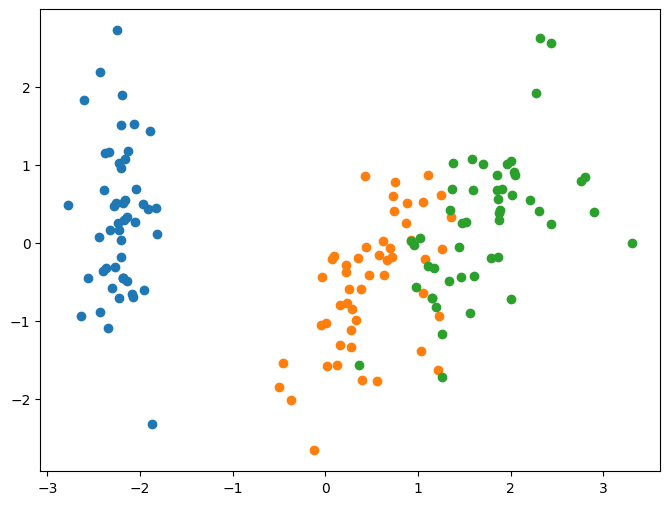

In [14]:
plt.figure(figsize=(8, 6))
if labels is not None:
    unique_labels = np.unique(labels)
    for label in unique_labels:
              plt.scatter(pca_df[pca_df['Species'] == label]['PC1'],
                         pca_df[pca_df['Species'] == label]['PC2'], label=label)
else:
      plt.scatter(pca_df['PC1'], pca_df['PC2'])



<ipython-input-15-530b10c67e61>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


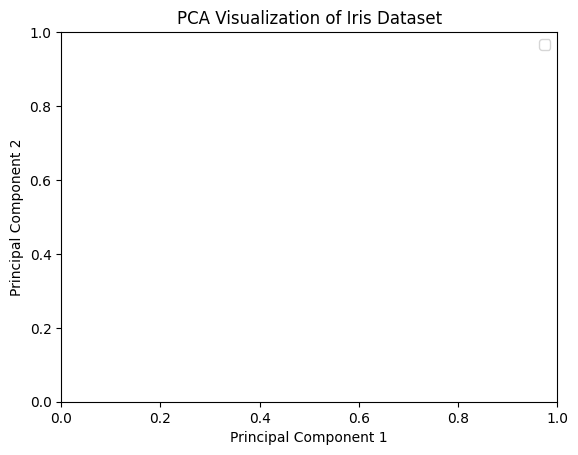

In [15]:
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Iris Dataset')
plt.legend()
plt.show()
